# How

- I joined a free class in [GSX](https://www.genshuixue.com/) and the class started from May 16th - May 18th.
- I followed the Appendex I from [Muddy Water Reserach Report](https://www.muddywatersresearch.com/research/gsx/mw-is-short-gsx/) and download message log file.
- I unzipped it into `all.json`.

In [1]:
DATA_ROOT_PATH = '/src/data/gsx/6004241052266238'
FILENAME = 'all.json'

In [2]:
import numpy as np
import math
import os.path
import json

In [3]:
with open(os.path.join(DATA_ROOT_PATH, FILENAME)) as jsonFile:
    msgLog = json.load(jsonFile)

In [4]:
# extract id and joinTime from the 'from' field
loginDict = dict()
for item in msgLog:
    userInfo = item.get('from')
    if userInfo is not None and userInfo.get('joinTime') is not None:
        loginDict[userInfo.get('id')] = userInfo.get('joinTime')

In [5]:
# The dictioanry with user ID as key and joinTime as value.
print(loginDict)

{'355733440': 1589712059, '355733695': 1589712223, '355733698': 1589712220, '355733701': 1589712221, '355733791': 1589712275, '355733887': 1589712328, '355733935': 1589712343, '355733941': 1589712352, '355734334': 1589712582, '355734301': 1589712554, '355734331': 1589712575, '355734709': 1589712775, '355734880': 1589712845, '355734760': 1589712799, '355734976': 1589712895, '355734994': 1589712913, '355735306': 1589713059, '355735717': 1589713209, '355735684': 1589713195, '355735348': 1589713069, '355736809': 1589713484, '355736104': 1589713298, '355736863': 1589713508, '355735384': 1589713081, '355736917': 1589713516, '355735465': 1589713115, '355737394': 1589713657, '355737280': 1589713628, '355737610': 1589713719, '355737817': 1589713781, '355737700': 1589713744, '355737838': 1589713785, '355738429': 1589713943, '355738438': 1589713945, '355738627': 1589713995, '355738993': 1589714096, '355738303': 1589713913, '355739299': 1589714166, '355736518': 1589713396, '355734070': 1589712421,

In [6]:
print(len(loginDict))

294


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

x = loginDict.keys()
y = loginDict.values()
y_np = np.array(list(y), dtype=np.int32)
from scipy import stats
stats.describe(y_np)


DescribeResult(nobs=294, minmax=(1589712059, 1589725594), mean=1589716398.972789, variance=9014591.835434517, skewness=1.1294539619822457, kurtosis=0.8573833715707186)

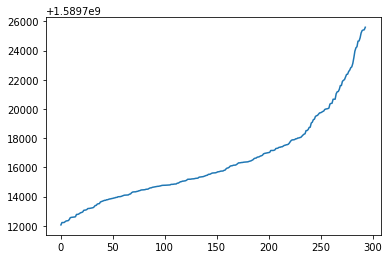

In [8]:
y_np_sorted = np.sort(y_np)
plt.plot(y_np_sorted)

## Find the Precise Joiner

In [9]:
y_np_min = np.min(y_np)
y_np_max = np.max(y_np)
print("min:%d, max:%d" % (y_np_min, y_np_max))

min:1589712059, max:1589725594


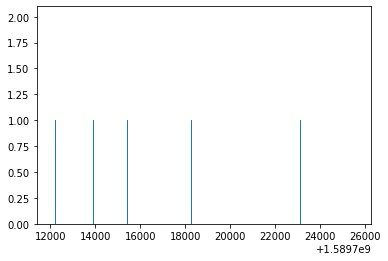

In [10]:
# I bucketed loginTime by 329 bins. It is more than enough.
n, bins, patches = plt.hist(y_np_sorted, range(y_np_min, y_np_max))

In [11]:
print(n)
print(bins)
print(patches)

[1. 0. 0. ... 0. 0. 0.]
[1589712059 1589712060 1589712061 ... 1589725591 1589725592 1589725593]
<a list of 13534 Patch objects>


In [12]:
n_indexes = list()

for index in range(len(n)):
    if n[index] > 1:
        n_indexes.append(index)
print(n_indexes)

[2261, 2712, 3125, 5096, 8609, 9542]


In [13]:
len(n_indexes)

6

In [14]:
duplicate_logintime = np.asarray(bins[n_indexes])

In [15]:
duplicate_logintime_ids = list()
for logintime in duplicate_logintime:
    for k, v in loginDict.items():
        if v == logintime:
            duplicate_logintime_ids.append(k)

In [16]:
print(duplicate_logintime)
print(len(duplicate_logintime))

[1589714320 1589714771 1589715184 1589717155 1589720668 1589721601]
6


In [17]:
print(duplicate_logintime_ids)
print(len(duplicate_logintime_ids))

['355739992', '355740016', '355742641', '355742623', '355746598', '355746580', '355778296', '355778278', '355810315', '355810312', '355816282', '355816291']
12


In [18]:
# the odd that they login at the same time
1/abs(y_np_min - y_np_max)

7.388252678241596e-05

In [19]:
for id in duplicate_logintime_ids:
    print('ID: %s, Login Time: %d' % (id, loginDict[id]))

ID: 355739992, Login Time: 1589714320
ID: 355740016, Login Time: 1589714320
ID: 355742641, Login Time: 1589714771
ID: 355742623, Login Time: 1589714771
ID: 355746598, Login Time: 1589715184
ID: 355746580, Login Time: 1589715184
ID: 355778296, Login Time: 1589717155
ID: 355778278, Login Time: 1589717155
ID: 355810315, Login Time: 1589720668
ID: 355810312, Login Time: 1589720668
ID: 355816282, Login Time: 1589721601
ID: 355816291, Login Time: 1589721601
